以下のYoutube動画を参考に作成

[https://www.youtube.com/watch?v=6R6-BCFd7zM&t=3300s](https://www.youtube.com/watch?v=6R6-BCFd7zM&list=PLavQwENTsEBVPMYIgjX5v5i4k3CyZguVO&index=8)

In [21]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import os
import datetime

start = "2020-01-01"
end = datetime.date.today()

df = data.DataReader("^N225", "yahoo", start, end)

df.to_csv("../data/N225.csv")

In [23]:
print(df.head())

print(df.dtypes)
#DateはIndexであって、カラム名ではない
#df.Dateは使えないので注意
#print(df.Date)

print(df.index)

                    High           Low          Open         Close    Volume  \
Date                                                                           
2020-01-06  23365.359375  23148.529297  23319.759766  23204.859375  72800000   
2020-01-07  23577.439453  23299.919922  23320.119141  23575.720703  64300000   
2020-01-08  23303.210938  22951.179688  23217.490234  23204.759766  79400000   
2020-01-09  23767.089844  23506.150391  23530.289062  23739.869141  62200000   
2020-01-10  23903.289062  23761.080078  23813.279297  23850.570312  55900000   

               Adj Close  
Date                      
2020-01-06  23204.859375  
2020-01-07  23575.720703  
2020-01-08  23204.759766  
2020-01-09  23739.869141  
2020-01-10  23850.570312  
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object
DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-1

In [24]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


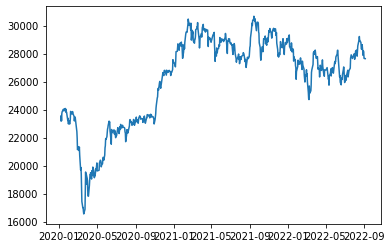

In [25]:
date = df.index
price = df["Adj Close"]
plt.plot(date, price)

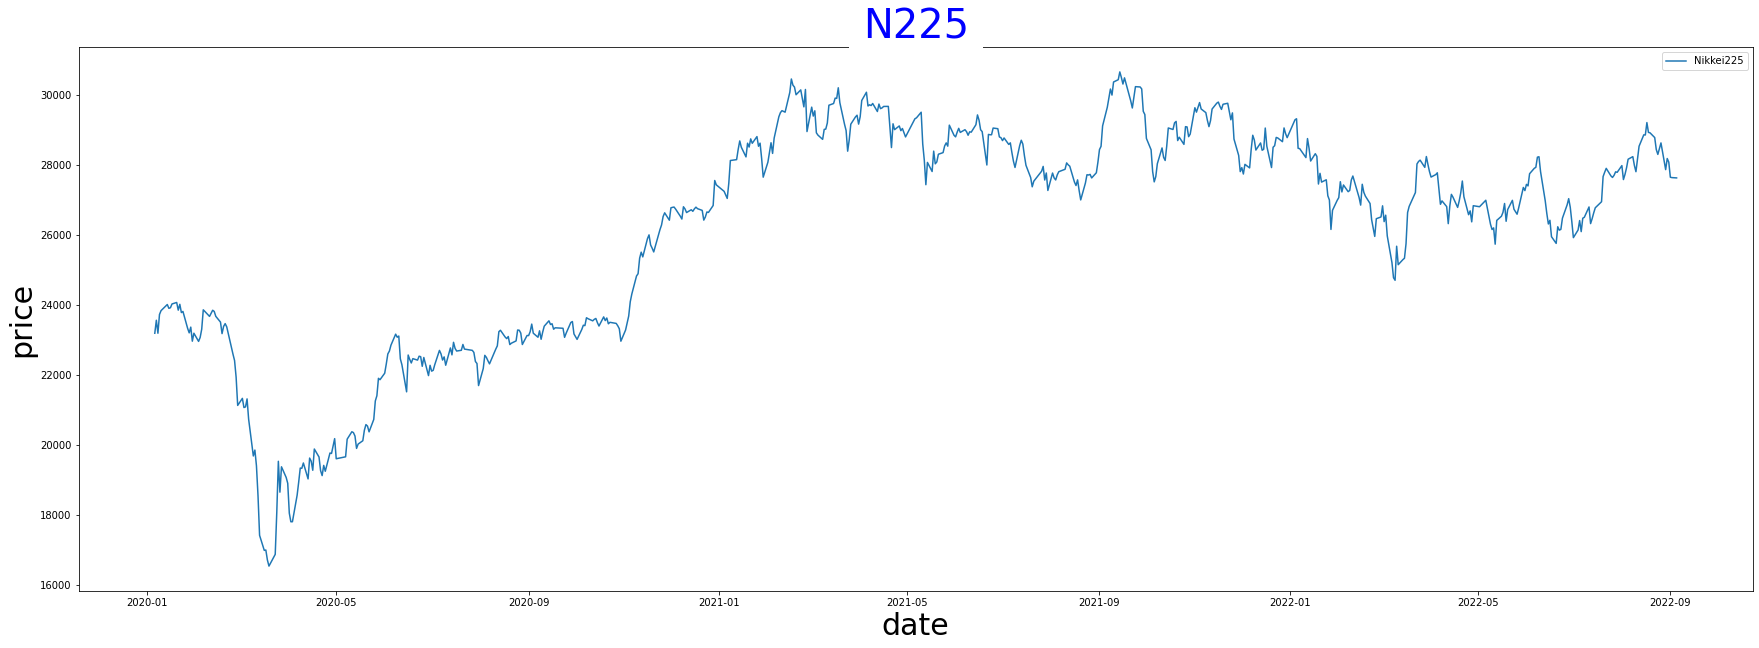

In [26]:
plt.figure(figsize=(30,10))
plt.plot(date, price, label = "Nikkei225")
plt.title("N225", color = "blue", backgroundcolor = "white", size = 40, loc = "center")
plt.xlabel("date", color = "black", size = 30)
plt.ylabel("price", color = "black", size = 30)
plt.legend()

In [27]:
span01 = 5
span02 = 25
span03 = 50

df["sma01_5"] = price.rolling(window=span01).mean()
df["sma02_25"] = price.rolling(window=span02).mean()
df["sma03_50"] = price.rolling(window=span03).mean()

#to_csvはデフォルトが上書きモード
df.to_csv("../data/N225_modified.csv")

#表示する行数を絞らない
pd.set_option("display.max_rows", None)
print(df.head(100))

                    High           Low          Open         Close     Volume  \
Date                                                                            
2020-01-06  23365.359375  23148.529297  23319.759766  23204.859375   72800000   
2020-01-07  23577.439453  23299.919922  23320.119141  23575.720703   64300000   
2020-01-08  23303.210938  22951.179688  23217.490234  23204.759766   79400000   
2020-01-09  23767.089844  23506.150391  23530.289062  23739.869141   62200000   
2020-01-10  23903.289062  23761.080078  23813.279297  23850.570312   55900000   
2020-01-14  24059.859375  23951.660156  23969.039062  24025.169922   64200000   
2020-01-15  23997.390625  23875.820312  23923.480469  23916.580078   57200000   
2020-01-16  23975.380859  23905.380859  23960.199219  23933.130859   55400000   
2020-01-17  24115.949219  24013.750000  24103.449219  24041.259766   59400000   
2020-01-20  24108.109375  24061.669922  24080.679688  24083.509766   38300000   
2020-01-21  24081.750000  23

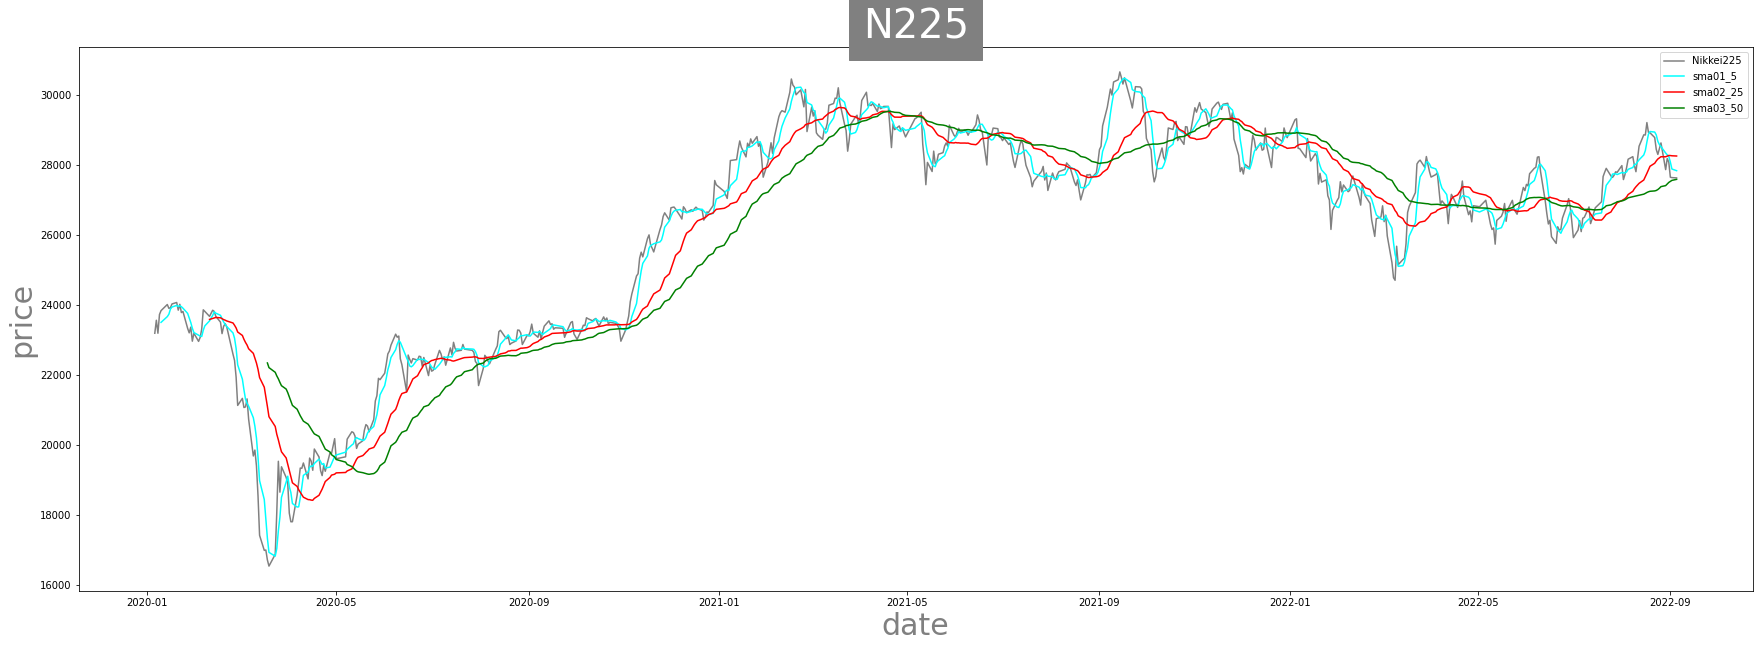

In [28]:
plt.figure(figsize=(30,10))
plt.plot(date, price, label = "Nikkei225", color = "grey")
plt.plot(date, df.sma01_5, label = "sma01_5", color = "cyan")
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red")
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green")

plt.title("N225", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.xlabel("date", color = "grey", size = 30)
plt.ylabel("price", color = "grey", size = 30)
plt.legend()

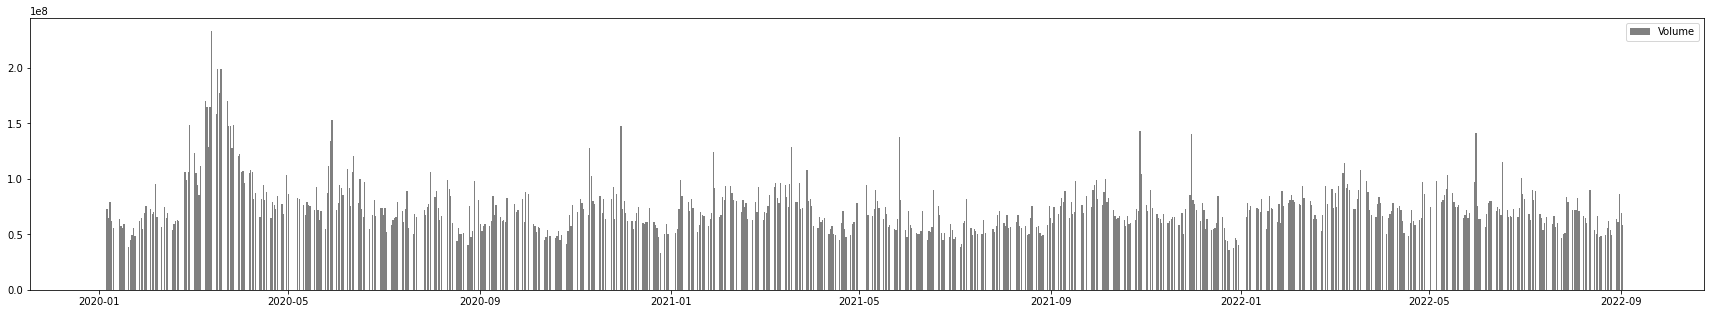

In [29]:
#plt.barで棒グラフ
#plt.bar(X軸、Y軸)
plt.figure(figsize=(30, 5))
plt.bar(date, df.Volume, label="Volume", color = "grey")
plt.legend()

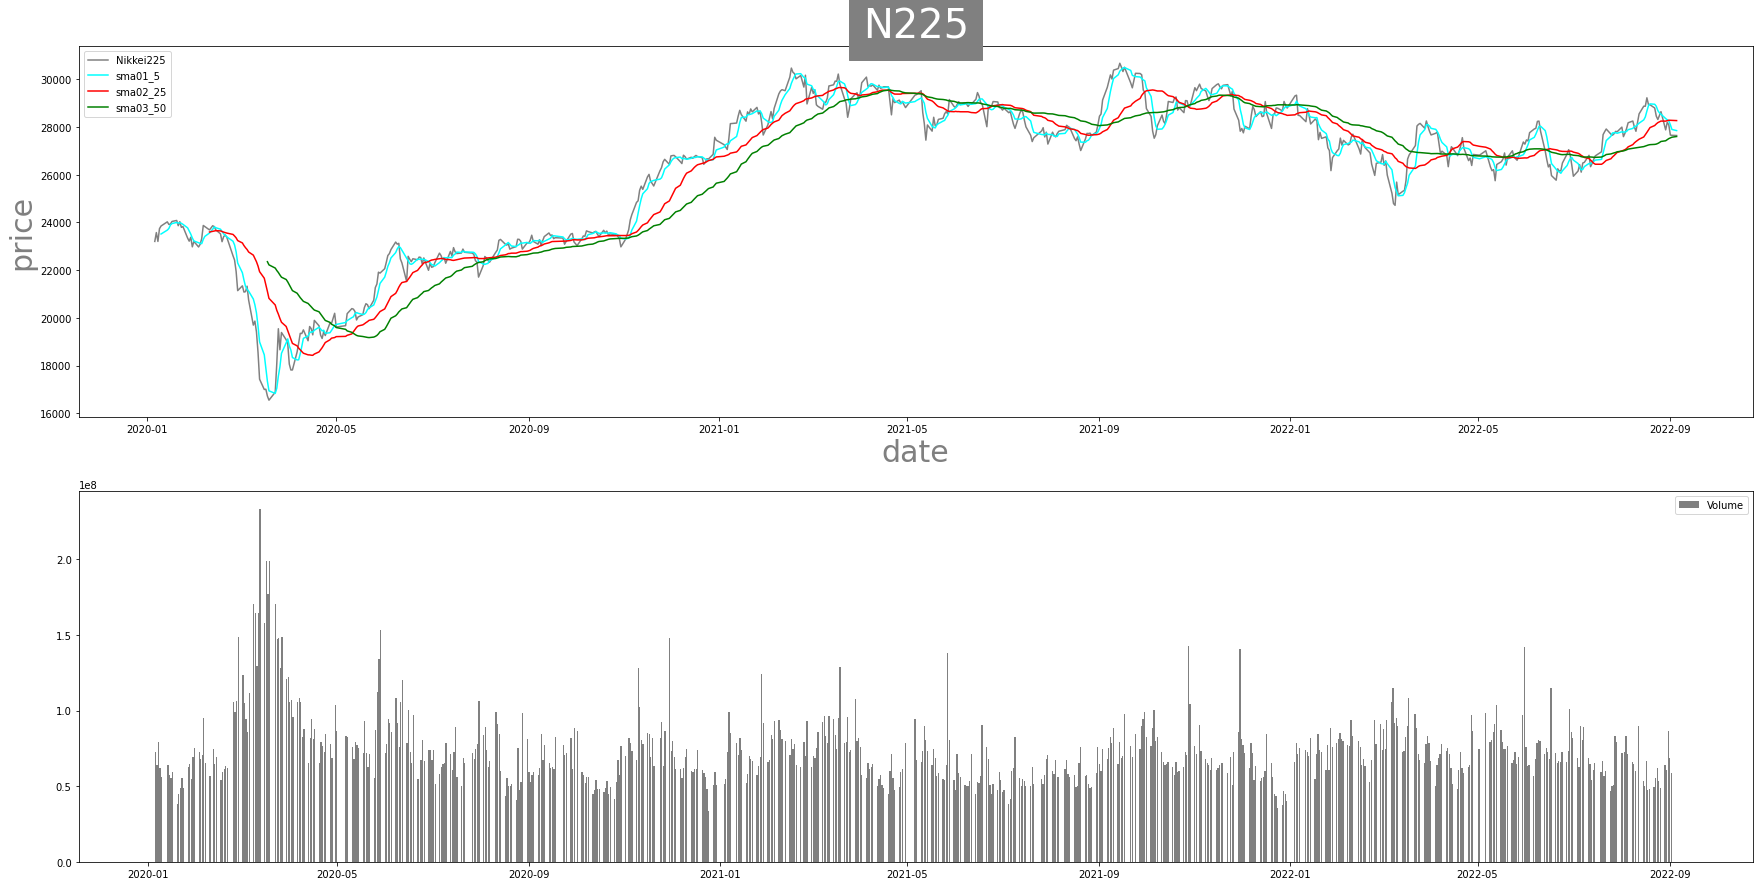

In [30]:
plt.figure(figsize=(30, 15))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(2, 1, 1)
plt.plot(date, price, label = "Nikkei225", color = "grey")
plt.plot(date, df.sma01_5, label = "sma01_5", color = "cyan")
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red")
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green")
plt.title("N225", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.xlabel("date", color = "grey", size = 30)
plt.ylabel("price", color = "grey", size = 30)
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(date, df.Volume, label="Volume", color = "grey")
plt.legend()

In [31]:
#リクルート
df_recruit = data.DataReader("6098.JP", "stooq")
df_recruit.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-02,4495.0,4549.0,4440.0,4544.0,5576500
2022-09-01,4413.0,4456.0,4413.0,4453.0,4256300
2022-08-31,4364.0,4485.0,4352.0,4483.0,5687500
2022-08-30,4435.0,4469.0,4366.0,4400.0,6782200
2022-08-29,4395.0,4410.0,4308.0,4397.0,7782700


In [32]:
print(df_recruit.index.min())
print(df_recruit.index.max())

2017-09-06 00:00:00
2022-09-02 00:00:00


In [33]:
df_recruit.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-09-12,2335.19,2366.54,2325.41,2353.81,5652022
2017-09-11,2310.73,2360.65,2292.11,2341.07,6061574
2017-09-08,2262.74,2318.54,2262.74,2306.78,7270825
2017-09-07,2305.84,2347.93,2278.42,2297.01,11256247
2017-09-06,2264.70,2305.84,2223.57,2296.03,22619632


In [34]:
#DataframeのIndexをソートする場合はsort_index、普通のカラムの場合はsort_values
#df.sort_index("カラム名", ascending = false)
df_recruit = df_recruit.sort_index()

In [35]:
df_recruit.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-09-06,2264.70,2305.84,2223.57,2296.03,22619632
2017-09-07,2305.84,2347.93,2278.42,2297.01,11256247
2017-09-08,2262.74,2318.54,2262.74,2306.78,7270825
2017-09-11,2310.73,2360.65,2292.11,2341.07,6061574
2017-09-12,2335.19,2366.54,2325.41,2353.81,5652022
2017-09-13,2369.47,2430.17,2358.70,2401.76,7855840
2017-09-14,2392.96,2438.00,2375.34,2393.95,6840336
2017-09-15,2358.70,2418.43,2356.74,2406.67,7810392
2017-09-19,2410.59,2417.44,2369.47,2408.62,9607928


In [36]:
#df.index >= "2019-06-01 00:00:00"
# print(len(df_recruit[df_recruit.index >= "2019-06-01 00:00:00"]))
# print(df_recruit[(df_recruit.index >= "2019-06-01 00:00:00") & (df_recruit.index <= "2020-01-01 00:00:00")].head(10))
# df_recruit = df_recruit[(df_recruit.index >= "2021-01-01 00:00:00") & (df_recruit.index <= "2022-08-01 00:00:00")]

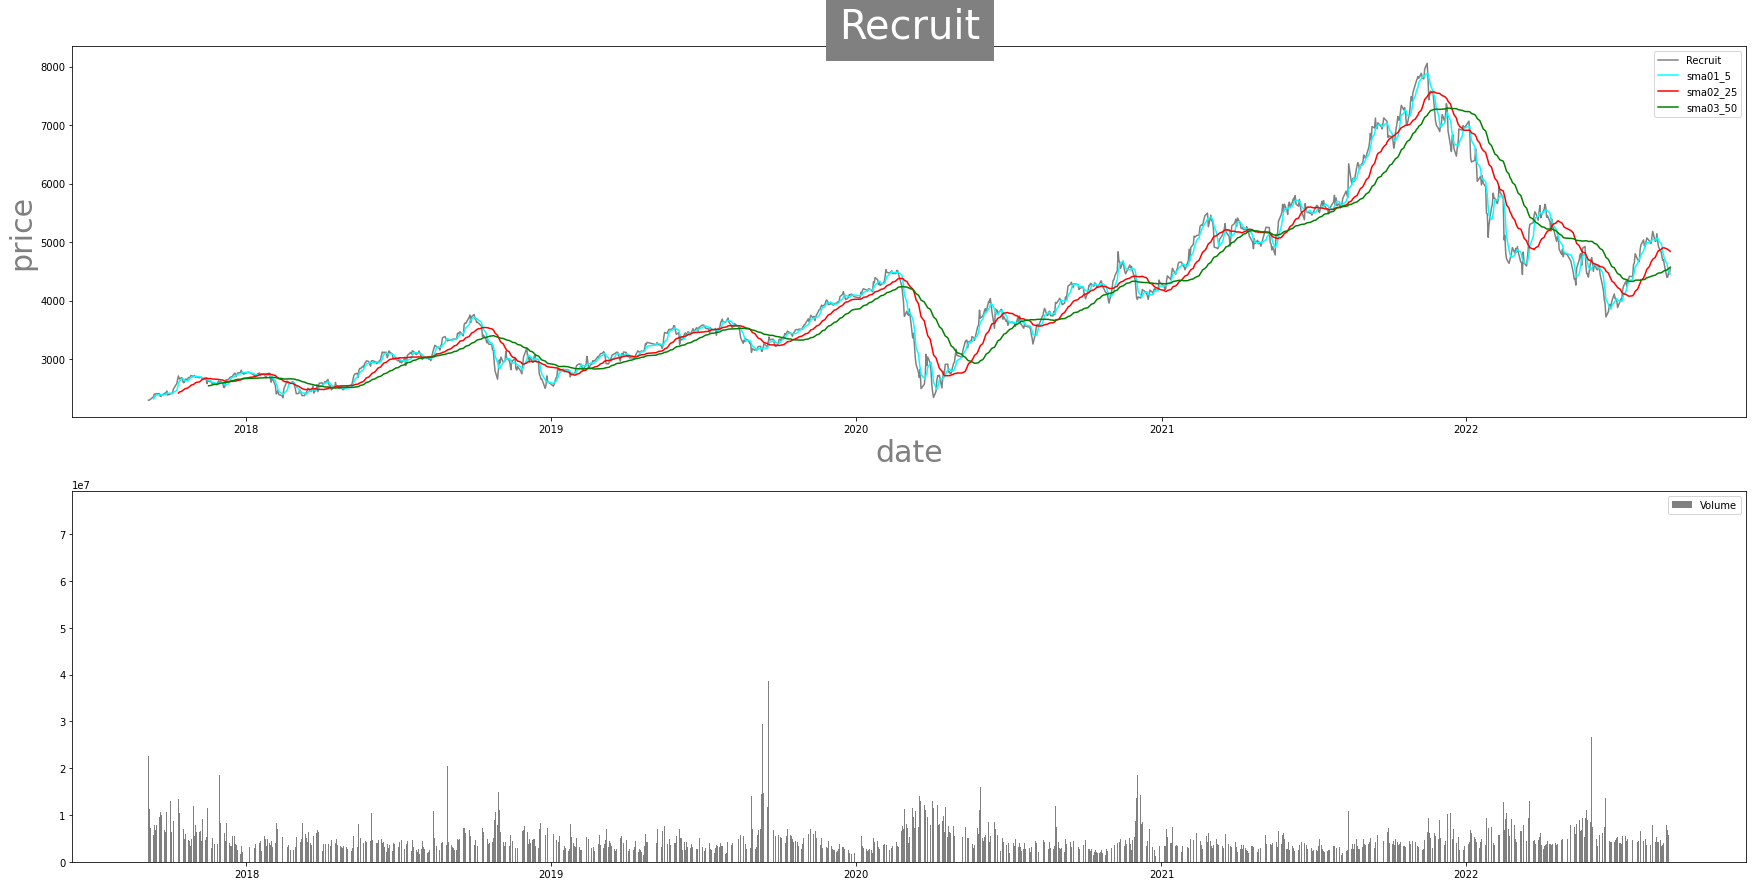

In [37]:
plt.figure(figsize=(30, 15))

#subplotで(縦、横、そのグラフを表示する番号)
date = df_recruit.index
price = df_recruit["Close"]
df_recruit["sma01_5"] = price.rolling(window=span01).mean()
df_recruit["sma02_25"] = price.rolling(window=span02).mean()
df_recruit["sma03_50"] = price.rolling(window=span03).mean()
plt.subplot(2, 1, 1)
plt.plot(date, price, label = "Recruit", color = "grey")
plt.plot(date, df_recruit.sma01_5, label = "sma01_5", color = "cyan")
plt.plot(date, df_recruit.sma02_25, label = "sma02_25", color = "red")
plt.plot(date, df_recruit.sma03_50, label = "sma03_50", color = "green")
plt.title("Recruit", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.xlabel("date", color = "grey", size = 30)
plt.ylabel("price", color = "grey", size = 30)
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(date, df_recruit.Volume, label="Volume", color = "grey")
plt.legend()

In [38]:
def stockprice_volume(start, end, code):
    dframe = data.DataReader(code, "stooq", start, end)
    dframe = dframe.sort_index()

    date = dframe.index
    price = dframe["Close"]
    span01 = 5
    span02 = 25
    span03 = 50

    dframe["sma01_5"] = price.rolling(window=span01).mean()
    dframe["sma02_25"] = price.rolling(window=span02).mean()
    dframe["sma03_50"] = price.rolling(window=span03).mean()

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(date, price, label = code, color = "grey")
    plt.plot(date, dframe.sma01_5, label = "sma01_5", color = "blue")
    plt.plot(date, dframe.sma02_25, label = "sma02_25", color = "red")
    plt.plot(date, dframe.sma03_50, label = "sma03_50", color = "green")
    plt.title(code, color = "white", backgroundcolor = "grey", size = 40, loc = "center")
    plt.xlabel("date", color = "grey", size = 30)
    plt.ylabel("price", color = "grey", size = 30)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(date, dframe.Volume, label="Volume", color = "grey")
    plt.legend()

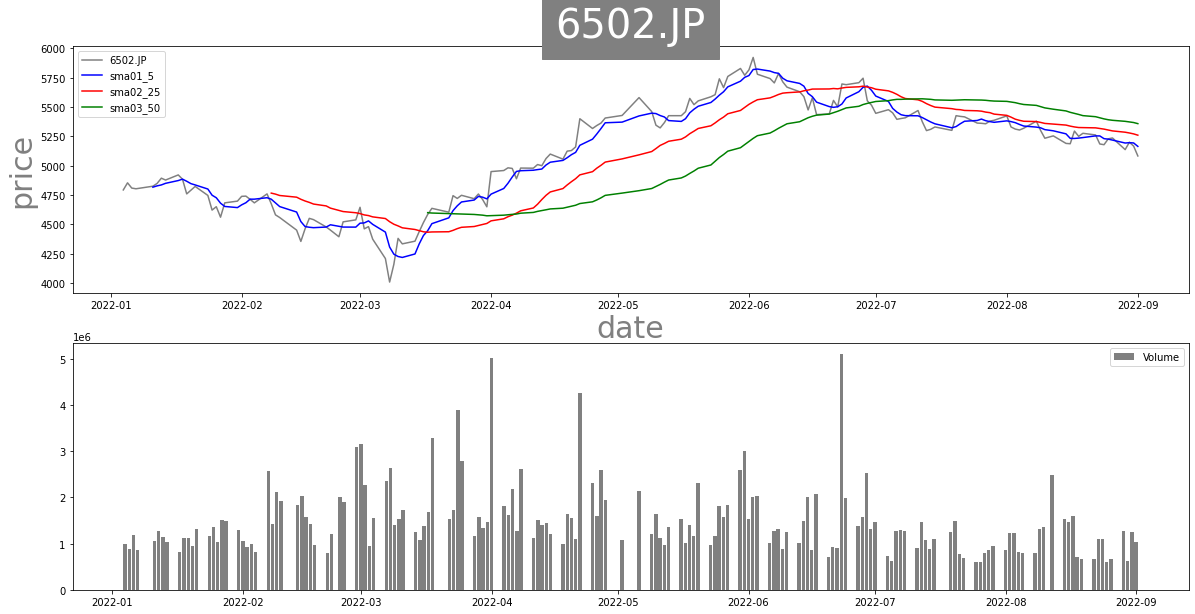

In [39]:
stockprice_volume("2022-01-01", "2022-09-01", "6502.JP")

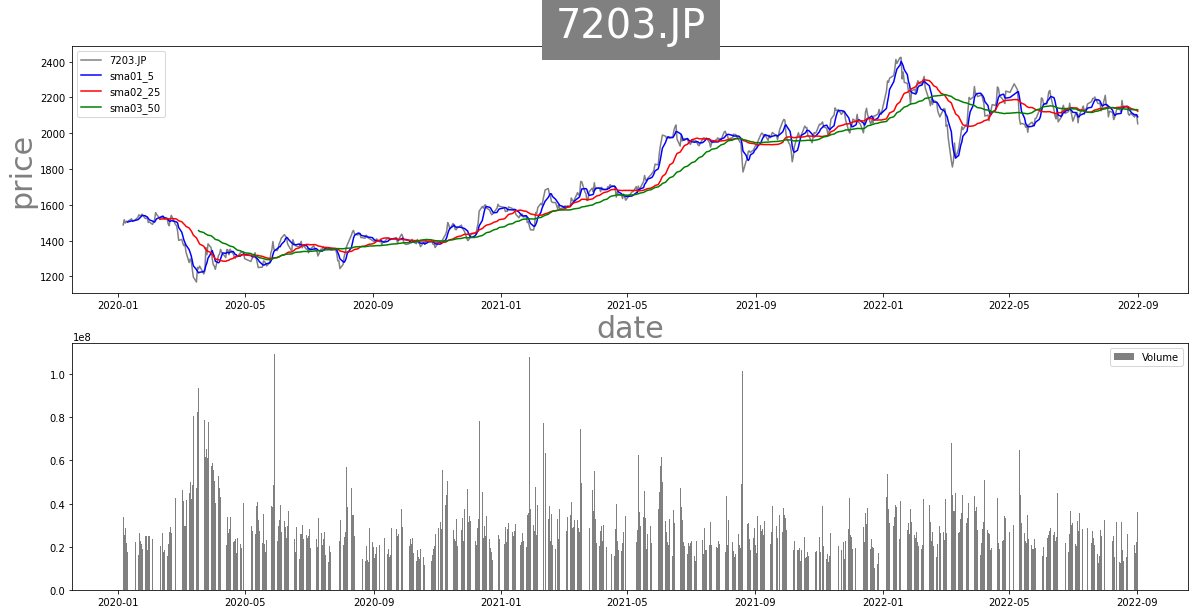

In [40]:
stockprice_volume("2020-01-01", "2022-09-01", "7203.JP")

In [41]:
import talib as ta
# import warinings
# warnings.simplefilter("ignore")

In [42]:
start = "2020-01-01"
end = datetime.date.today()

df = data.DataReader("^N225", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,23365.359375,23148.529297,23319.759766,23204.859375,72800000,23204.859375
2020-01-07,23577.439453,23299.919922,23320.119141,23575.720703,64300000,23575.720703
2020-01-08,23303.210938,22951.179688,23217.490234,23204.759766,79400000,23204.759766
2020-01-09,23767.089844,23506.150391,23530.289062,23739.869141,62200000,23739.869141
2020-01-10,23903.289062,23761.080078,23813.279297,23850.570312,55900000,23850.570312
